## Astro 100: Homework 2 
by Alexander McPike

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
import os
from astroquery.gaia import Gaia
from astropy.coordinates import SkyCoord

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [2]:
from astropy.convolution import convolve, Box1DKernel, Box2DKernel

In [3]:
from photutils import DAOStarFinder
from astropy.stats import mad_std

In [4]:
from astropy import wcs
from astropy.wcs import WCS
from astropy.table import Table

In [5]:
from photutils import aperture_photometry, CircularAperture

In [6]:
from astropy.table import QTable
from astropy import units as u
from astropy import constants as const
from astropy.units import imperial

In [7]:
from astropy.coordinates import SkyCoord

## Step 1

This week we continue assembling pieces of an image reduction
pipeline, and compare to other measurements.

Take the image we have been using

PTF_201307021787_i_p_scie_t041723_u016616794_f02_p003486_c11.fits

and examine the header, looking for the World Coordinate System
information.  This is in human-readable form in the header of the
file, so you can even type
more PTF_201307021787_i_p_scie_t041723_u016616794_f02_p003486_c11.fits

and scroll down until you see this

WCSAXES =                    2 / Number of axes in world coordinate system      
CRVAL1  =     217.309490953823 / [deg] RA of reference point                    
CRVAL2  =     16.6581466832508 / [deg] DEC of reference point                   
CRPIX1  =             1497.193 / [pix] Image reference point                    
CRPIX2  =             609.3031 / [pix] Image reference point                    
 
 . . .

This tells you that (x,y)= (1497.193, 609.3031) is the reference point
in the image (the tangent point on the celestial sphere) and that that
point corresponds to (RA, dec) = (217.309, 16.658).

The pixel scale is about 0.000280 deg/pixel. 


In [8]:
dir_ = "../../Notes/2020_02_04_Astropy_and_Fits/data/"
imageName = 'PTF_201307021787_i_p_scie_t041723_u016616794_f02_p003486_c11.fits'
print(dir_+imageName)
f  = fits.open(dir_+imageName)
exampleData = f[0].data #This is the image array, "pulling out the image array"

../../Notes/2020_02_04_Astropy_and_Fits/data/PTF_201307021787_i_p_scie_t041723_u016616794_f02_p003486_c11.fits


In [9]:
exampleHeader = f[0].header
exampleHeader  

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / FOUR-BYTE SINGLE PRECISION FLOATING POINT      
NAXIS   =                    2 / STANDARD FITS FORMAT                           
NAXIS1  =                 2048 / STANDARD FITS FORMAT                           
NAXIS2  =                 4096 / STANDARD FITS FORMAT                           
ORIGIN  = 'Palomar Transient Factory' / Origin of these image data              
CREATOR = 'Infrared Processing and Analysis Center' / Creator of this FITS file 
TELESCOP= 'P48     '           / Name of telescope                              
INSTRUME= 'PTF/MOSAIC'         / Instrument name                                
OBSERVER= 'KulkarniPTF'        / Observer name and project                      
CCDID   = '11      '           / CCD number (0..11)                             
DATE-OBS= '2013-07-02T04:17:23.555' / UTC shutter time YYYY-MM-DDTHH:MM:SS.SSS  
DATE    = '2013-07-01T21:35:

## Step 2

Read about the astropy WCS package

https://docs.astropy.org/en/stable/wcs/

focusing for now on wcs_pix2world()


#### 1.  What is the difference between wcs_pix2world() and all_pix2world() ?
    
       The image transformation that takes place. wcs_pix2world() only applies the wcslib transformation, while all_pix2world() applies a series of transformations.
       
       

#### 2.  What is a SIP convention for representing distortions (in one sentence)?

        It's a way of storing information about the distortion of the image in the header of FITS images. 

## Step 3

Now let's have a look at the Gaia archive.  If you are unfamiliar with
Gaia, please read
https://sci.esa.int/web/gaia/-/28820-summary

If you already know about Gaia, you can jump straight here
https://gea.esac.esa.int/archive/
and click on "Search"

Please query objects within a radius of 15 arcminutes of 

RA = 217.309, dec = 16.658   (J2000 ICRS coordinates)

and download this file as a FITS file.
If you are unsure how to read a FITS binary table, this may help
https://docs.astropy.org/en/stable/io/fits/

## Step 4

Next convert those (RA, dec) coordinates to (x,y) pixel coordinates in
our image.

In [11]:
coord = SkyCoord(ra = 217.309, dec=16.658, unit=(u.degree, u.degree), frame='icrs')
table = Gaia.query_object_async(coordinate=coord, radius = 15* u.arcmin)

w = wcs.WCS(exampleHeader)

worldcoord = np.array([table['ra'], table['dec']]).T

pixelcoord = w.wcs_world2pix(worldcoord, 1)

INFO: Query finished. [astroquery.utils.tap.core]


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


## Step 5
Overplot them as circles of an appropriate size, maybe
with transparency 0.5, on the image.  Does the astrometry look right?

FITS headers have a 1-indexed convention, and Python is 0-indexed.  Is
that OK?

    Yes, the loaded functions and written code are able to take this into account.

In class, we write a "findstar" function to find stars in an image,
and then we also used DAOFind.

Please run those on the image, and make a scatterplot with symbols for
findstar, DAOFind, and the Gaia (x,y) positions.  We want to be able
to see any offsets, so maybe zoom in on some interesting region of the
X and Y range rather than plotting the entire thing.  Do the 3 ways of
finding star positions seem to line up?


Please take a stab at this before Tuesday, and then we'll be happy to
stay after class and talk through pieces of this with you.

# Gaia Section

Text(0.5, 1.0, 'Gaia Overlay')

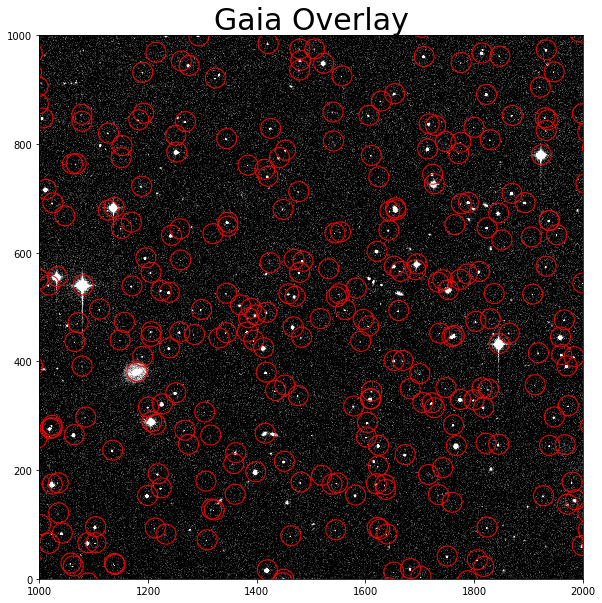

In [12]:
#plotting the array
plt.figure(figsize=(10,10))
plt.imshow(exampleData, vmin=1300 ,vmax=1500, cmap='gray') 
plt.scatter(pixelcoord[:,0],pixelcoord[:,1],s = 400, marker = 'o',facecolors='none', edgecolors = 'r')
plt.ylim(0,1000)
plt.xlim(1000,2000)
plt.title('Gaia Overlay', fontsize=30)

# Findstars Section

In [13]:
def findstars(image,nstar=10):
    
    #get the x's and y's from this function and call the aperture photometry function

    #sy,sx = image.shape
    npad=5
    #nstar=10
    blankval = -1
    
    #Initialize output arrays
    x = np.zeros(nstar).astype('int32') #you can't use floating point numbers to index into an array
    y = np.zeros(nstar).astype('int32')
    flux=np.zeros(nstar)
    
    #Trim edges of the image
    image[0:npad,:] = blankval 
    image[:,0:npad] = blankval 
    image[-npad-1:-1,:] = blankval
    image[:,-npad-1:-1] = blankval
    
    #Loop over stars
    for i in np.arange(nstar):
        indmax = np.argmax(image)
        y[i],x[i] = np.unravel_index(indmax,image.shape)
#         y[i]= indmax // sx
#         x[i]= indmax % sx
        flux[i] = image[y[i],x[i]] #value at peak, not really flux
        print(i, x[i], y[i], flux[i])
        
        image[y[i]-npad:y[i]+npad, x[i]-npad:x[i]+npad] = blankval
        
    return x,y,flux    

In [14]:
x,y,flux = findstars(exampleData.copy(), 1000)

0 1673 1668 61444.5859375
1 665 2539 61394.6328125
2 1016 3520 61387.54296875
3 1938 2040 61381.96875
4 1847 2404 61360.7578125
5 667 2518 61337.234375
6 1624 3262 61337.02734375
7 378 966 61324.65625
8 467 2015 61314.72265625
9 901 3829 61306.203125
10 668 2526 61232.44921875
11 1127 3644 61218.6328125
12 369 1095 61217.984375
13 665 2489 61211.69921875
14 1081 539 61206.00390625
15 204 255 61200.72265625
16 552 3273 61195.46484375
17 1034 553 61187.08203125
18 665 2533 61180.328125
19 2041 210 61179.12109375
20 667 2589 61174.234375
21 900 3846 61171.5625
22 379 979 61157.30078125
23 1126 3638 61154.1015625
24 667 2594 61153.98046875
25 666 2556 61151.93359375
26 378 997 61144.21875
27 2041 217 61139.4921875
28 379 973 61138.7734375
29 900 3817 61138.453125
30 379 1004 61135.17578125
31 665 2563 61131.5078125
32 105 2922 61131.09765625
33 1847 2388 61129.70703125
34 902 3838 61128.75390625
35 666 2475 61123.17578125
36 666 2465 61118.9453125
37 66 120 61115.4921875
38 666 2545 61114.

309 1466 462 14226.126953125
310 1385 1175 14224.046875
311 1227 3498 14150.0390625
312 634 3873 13990.6318359375
313 655 153 13902.1005859375
314 46 47 13878.8525390625
315 377 3570 13874.095703125
316 380 2085 13701.986328125
317 870 2991 13591.166015625
318 564 2215 13413.072265625
319 696 2149 13394.2001953125
320 519 1431 13387.44140625
321 601 2964 13234.888671875
322 1479 3808 13198.6435546875
323 12 2222 13102.76171875
324 175 1209 12963.5126953125
325 399 2712 12899.0986328125
326 699 3345 12676.353515625
327 1111 2330 12580.0322265625
328 524 1714 12434.6005859375
329 282 1931 12336.46875
330 957 3622 12332.533203125
331 1063 264 12315.1396484375
332 1713 790 12246.09765625
333 1565 3144 12245.404296875
334 962 371 12157.7724609375
335 1038 3880 12062.4638671875
336 1911 1199 11984.1513671875
337 952 136 11906.65625
338 839 4038 11849.1513671875
339 1648 3264 11830.376953125
340 1735 1178 11792.4033203125
341 1393 1933 11727.9970703125
342 1758 445 11608.6103515625
343 2047 8

603 1965 3811 4185.15380859375
604 234 211 4179.67529296875
605 507 3373 4155.2861328125
606 1474 3073 4146.4970703125
607 1707 960 4122.1533203125
608 642 3729 4120.05517578125
609 722 1298 4114.01318359375
610 907 3836 4112.541015625
611 274 3748 4082.462646484375
612 6 1915 4078.17529296875
613 700 665 4064.916259765625
614 393 1856 4059.20068359375
615 1872 4052 4053.64013671875
616 134 4055 4052.56640625
617 1112 797 4044.321533203125
618 1678 2070 4038.7744140625
619 10 1575 4023.8955078125
620 409 1513 4016.52587890625
621 1633 1670 3998.432373046875
622 108 4035 3994.574951171875
623 346 517 3952.349365234375
624 1822 890 3939.45166015625
625 1484 583 3938.614013671875
626 1823 1974 3903.703857421875
627 677 2819 3890.94970703125
628 6 1250 3865.776611328125
629 2036 1320 3862.7314453125
630 799 3163 3858.778076171875
631 1272 3173 3840.766357421875
632 873 3234 3821.280029296875
633 1238 424 3808.791259765625
634 628 343 3806.99951171875
635 593 1821 3805.31591796875
636 408 3

883 1110 3217 2519.618408203125
884 1807 1876 2519.134033203125
885 1558 2665 2519.012939453125
886 691 1404 2517.421630859375
887 2010 3549 2516.305419921875
888 373 975 2514.397216796875
889 1458 523 2514.140625
890 572 737 2511.94091796875
891 1844 246 2510.34912109375
892 859 1747 2509.852294921875
893 367 981 2509.010986328125
894 1817 315 2508.536865234375
895 1425 1088 2504.363525390625
896 1946 1302 2501.5244140625
897 127 1507 2498.697509765625
898 487 1840 2487.986572265625
899 1799 328 2486.378173828125
900 84 2990 2481.751220703125
901 376 1179 2480.482177734375
902 1560 1514 2479.41015625
903 1458 1536 2479.36572265625
904 1682 18 2477.51806640625
905 1162 3374 2476.162109375
906 95 94 2475.271728515625
907 1420 2970 2472.739501953125
908 782 3299 2469.116943359375
909 726 2467 2465.0625
910 423 3021 2463.8544921875
911 711 2333 2456.688232421875
912 1591 2153 2456.417724609375
913 32 3765 2455.647216796875
914 62 1185 2451.81494140625
915 502 1552 2451.154296875
916 1072 

Text(0.5, 1.0, 'Findstar Overlay')

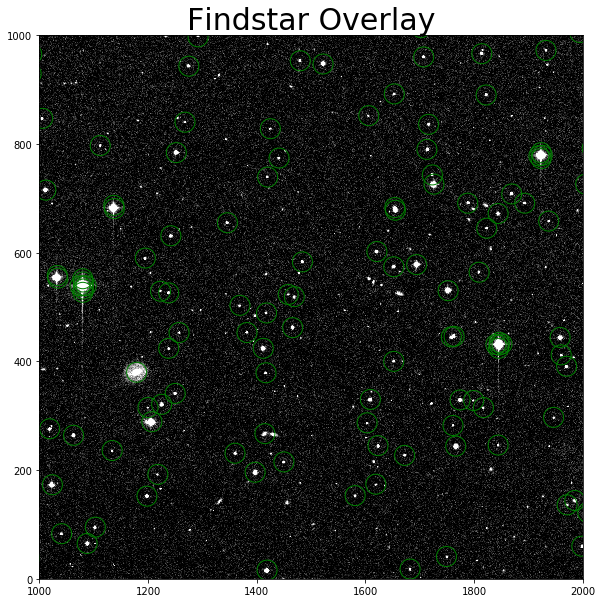

In [15]:
plt.figure(figsize=(10,10))
plt.imshow(exampleData, vmin=1300 ,vmax=1500, cmap='gray') 

plt.scatter(x, y,s = 400, marker = 'o',facecolors='none', edgecolors = 'g')

plt.ylim(0,1000)
plt.xlim(1000,2000)
plt.title('Findstar Overlay', fontsize=30)

# DAOStarfinder Overlay

In [16]:
mean = np.mean(exampleData)
median = np.median(exampleData)
sigma = np.std(exampleData)

bkg_sigma = mad_std(exampleData)

daofind = DAOStarFinder(fwhm=4., threshold=10.*bkg_sigma)

sources = daofind(exampleData)

positions = np.transpose((sources['xcentroid'],sources['ycentroid']))

apertures = CircularAperture(positions, r=4.) #the 4. is just good practice to avoid integers

phot_table = aperture_photometry(exampleData, apertures)

Text(0.5, 1.0, 'DAOStarfinder Overlay')

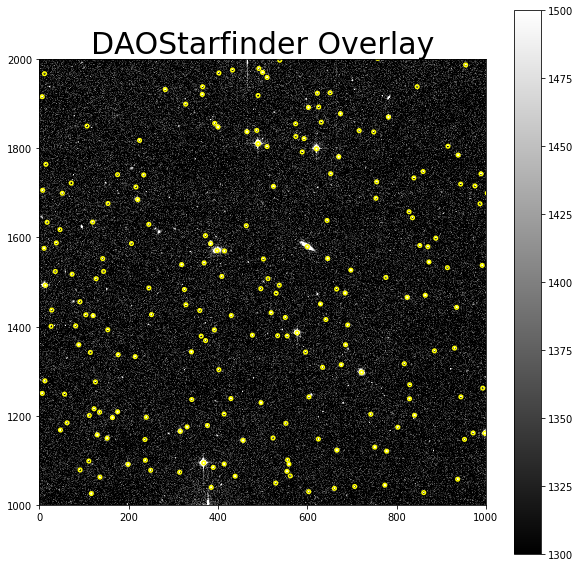

In [17]:
plt.figure(figsize=(10,10))
#plt.imshow(exampleData, vmin=median-.1*sigma, vmax=median+.1*sigma, origin='lower', cmap='gray')
plt.imshow(exampleData, vmin=1300 ,vmax=1500, cmap='gray')
plt.colorbar()
plt.xlim(0,1000)
plt.ylim(1000,2000)
apertures.plot(color='yellow', lw=1.5)
plt.title('DAOStarfinder Overlay', fontsize=30)

# Combined Plots

Text(0.5, 1.0, 'Combined Overlay')

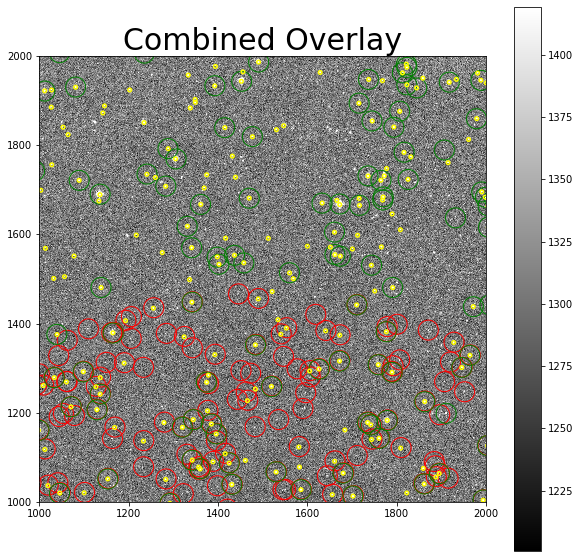

In [18]:
#DAOStarfinder
plt.figure(figsize=(10,10))
plt.imshow(exampleData, vmin=median-.1*sigma, vmax=median+.1*sigma, origin='lower', cmap = 'gray')
plt.colorbar()

#Gaia
plt.scatter(pixelcoord[:,0],pixelcoord[:,1],s = 400, marker = 'o',facecolors='none', edgecolors = 'r')

#Findstar
plt.scatter(x, y,s = 400, marker = 'o',facecolors='none', edgecolors = 'g')

plt.xlim(1000,2000)
plt.ylim(1000,2000)
apertures.plot(color='yellow', lw=1.5)
plt.title('Combined Overlay', fontsize=30)

#### They line up in many cases, though not all. It's interesting to note that the DAOStarfinder array seems to pick up the most. This should change based on the value we set our threshold to.